In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad
from scipy.special import gamma
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.optimize import curve_fit
import json

In [3]:
def trans(r):
    return np.exp(-r/10)

def inverse_transform_sampling(n_samples=10000):
    u= np.random.uniform(0, 1, n_samples)  
    r_samples= (u * 23+2)  # (u * (R_max - R_min)+ R_min)
    x_samples= trans(r_samples)  
    return x_samples

def trace_histogram(data, bins=250, range=(-300, 300)):
    counts, edges = np.histogram(data, bins=bins, range=range, density=True)
    left, right = edges[:-1], edges[1:]
    X= np.array([left, right]).T.flatten()
    Y= np.array([counts, counts]).T.flatten()
    return X, Y

def run_simulation(i):
    
    n_samples = 10000
    u = np.random.uniform(0, 1, n_samples)
    samples_tani = 1*np.tan((np.pi * u) / 2)
    uu = np.random.uniform(0, 1, n_samples)
    samples_cos = 1* np.cos((np.pi * uu) / 0.5)

    
    samples_3= inverse_transform_sampling()

    B00 = load_from_txt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_5/B_15/B00_samples.txt")
    nee = load_from_txt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_5/B_15/nee_samples.txt")

    B_parallel_samples = - 0.81*500*samples_cos *samples_tani *samples_3*B00[i]*nee[i]
    X_BU, Y_BU= trace_histogram(B_parallel_samples)
    # print("X_BU:", X_BU)
    # print("Y_BU:", Y_BU)
    # plt.figure(figsize=(10, 6))
    # plt.plot(X_BU,Y_BU, color='r',linewidth=2)
    # plt.yscale("log")
    # plt.xlim(-200, 200)
    # plt.ylim(10**(-4), 10**(-1))
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    return X_BU, Y_BU

def load_from_txt(filename):
    return np.loadtxt(filename)

def save_to_txt(filename, data):
    np.savetxt(filename, data, fmt="%.6f")

def main():
    num_runs = 10000
    X_BU_combined = None
    Y_BU_combined = None

    for i in range(num_runs):
        # print(f"\n--- Run {i+1} ---")
        X_BU, Y_BU = run_simulation(i)

        if X_BU_combined is None:
            X_BU_combined = X_BU
            Y_BU_combined = Y_BU
        else:
            Y_BU_combined += Y_BU  
            
    Y_BU_combined /= num_runs
    
    np.savetxt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/BU_combined_15_5.txt", np.column_stack((X_BU_combined, Y_BU_combined)), fmt="%.6f")
    
    # plt.figure(figsize=(10, 6))
    # plt.plot(X_BU_combined, Y_BU_combined, color='b', linewidth=2)
    # plt.yscale("log")
    # plt.xlim(-200, 200)
    # plt.ylim(1e-4, 1e-1)
    # plt.legend()
    # plt.grid(True)
    # plt.show()

if __name__ == "__main__":
    main()

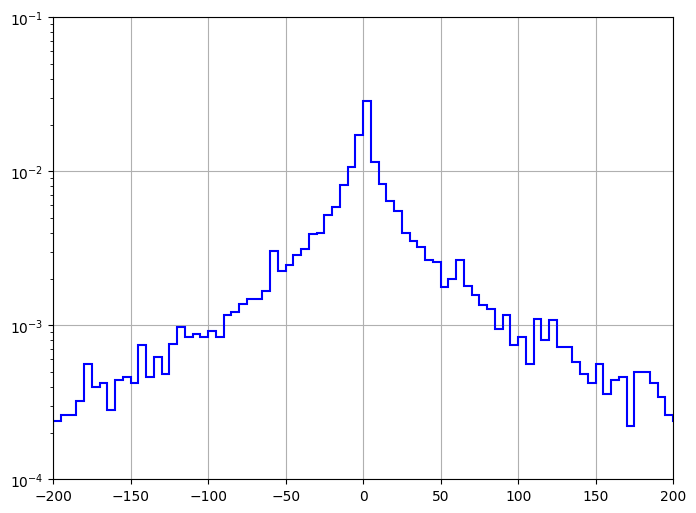

In [4]:
loaded_data = np.loadtxt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/BU_combined_15_5.txt")
X_BU_l, Y_BU_l = loaded_data[:, 0], loaded_data[:, 1]
Y_BU_l_normalized = Y_BU_l / np.sum(Y_BU_l)

num_samples = 10000
sampled_data1 = np.random.choice(X_BU_l, size=num_samples, p=Y_BU_l_normalized)

bin_edges = np.arange(-300, 300, 5)

plt.figure(figsize=(8, 6))
plt.hist(sampled_data1, bins=bin_edges, density=True,histtype='step', color='b', alpha=1.0, linewidth=1.5 )
plt.xlim(-200, 200)
plt.ylim(10**-4, 10**-1)
plt.yscale("log")
plt.grid(True)
plt.show()

a1 = 0.0060
m1 = 0.0023
w1 = 42.2485
a2 = 0.0121
m2 = -0.0009
w2 = 14.1187
a3 = 0.0073
m3 = 0.0009
w3 = 197.0940


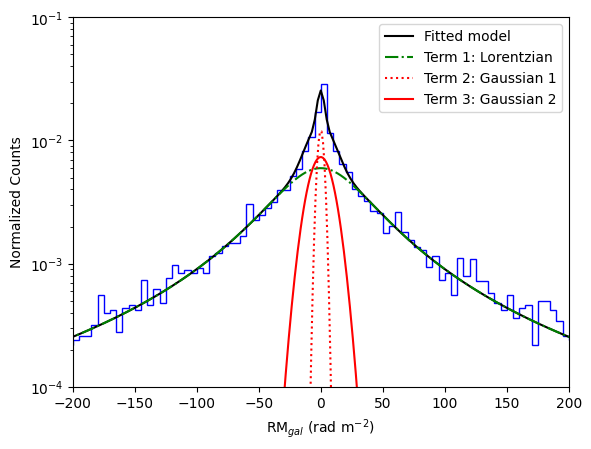

In [5]:
loaded_data = np.loadtxt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_5/B_15/BU_combined_15_5.txt")

x_data = loaded_data[:, 0] 
y_data = loaded_data[:, 1]  

def model_func(x, a1, m1, w1, a2, m2, w2, a3, m3, w3):
    term1 = a1 * (w1**2 / (w1**2 + (x - m1)**2))
    term2 = a2 * np.exp(-((x - m2) ** 2) / w2)
    term3 = a3 * np.exp(-((x - m3) ** 2) / w3)
    return term1 + term2 + term3

initial_guess = [0.0056,	0.1938,	43.1145,	0.0229,	0.9730,	9.2544,	0.0076,	0.2093,	179.8467]  

popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)

a1, m1, w1, a2, m2, w2, a3, m3, w3 = popt
param_names = ["a1", "m1", "w1","a2", "m2", "w2", "a3", "m3", "w3"]
for name, value in zip(param_names, popt):
    print(f"{name} = {value:.4f}")

x_fit = np.linspace(-300, 300, 500)

y_term1 = popt[0] * (popt[2]**2 / (popt[2]**2 + (x_fit - popt[1])**2))
y_term2 = popt[3] * np.exp(-((x_fit - popt[4]) ** 2) / popt[5])
y_term3 = popt[6] * np.exp(-((x_fit - popt[7]) ** 2) / popt[8])
tot = y_term1+y_term2+y_term3

plt.hist(sampled_data1, bins=bin_edges, density=True, histtype='step', color='b')
plt.plot(x_data, model_func(x_data, *popt), 'black', label='Fitted model')
plt.plot(x_fit, y_term1, 'g-.', label="Term 1: Lorentzian")
plt.plot(x_fit, y_term2, 'r:', label="Term 2: Gaussian 1")
plt.plot(x_fit, y_term3, 'r', label="Term 3: Gaussian 2")
plt.xlim(-200, 200)
plt.ylim(10**-4, 10**-1)
plt.yscale("log")
plt.legend()
plt.xlabel(r"RM$_{gal}$ (rad m$^{-2}$)")
plt.ylabel('Normalized Counts')
plt.show()
